<a href="https://colab.research.google.com/github/MN589/Data-Science-and-ML-Project-Portfolio/blob/main/Identifying%20Ship's%20requiring%20maintenance%20using%20Anomoly%20Detection/Identifying_Ship's_requiring_maintenance_using_Anomoly_Detection%2C%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Detecting the anomalous activity of a ship’s engine

## **Business context**
You are provided with a real data set to identify anomalous activity in a ship’s engine functionality (Devabrat,  2022). As you work through this project, keep in mind that, typically speaking, anomalies would make up a minority of the data points (i.e., about 1% to 5% of the data points would be anomalies).

The data set contains six important features continuously monitored to evaluate the engine's status as ‘good’ or ‘bad’. These features are:
- **Engine rpm (revolutions per minute):** A high rpm indicates the engine is operating at a higher speed than designed for prolonged periods, which can lead to overheating, excessive wear, and eventual failure. A low rpm could signal a lack of power, issues with fuel delivery, or internal mechanical problems.
- **Lubrication oil pressure:** Low lubrication oil pressure indicates insufficient lubrication, leading to increased friction, overheating, and engine damage. A high lubrication oil pressure could signal a blockage in the oil delivery system, potentially causing seal or gasket failure.
- **Fuel pressure:** High fuel pressure can cause poor engine performance and incomplete combustion, indicating fuel pump or filter issues. A low fuel pressure may result in excessive fuel consumption, poor emissions, or damage to the fuel injectors.
- **Coolant pressure:** Low coolant pressure indicates a potential leak in the cooling system or a coolant pump failure, risking engine overheating. A high coolant pressure could be a sign of a blockage in the cooling system or a failing head gasket, which can also lead to overheating.
- **Lubrication oil temperature:** High lubrication oil temperature suggests the oil is overheating, which can degrade its lubricating properties and lead to engine damage. A low lubrication oil temperature may indicate it is not reaching its optimal operating temperature, potentially causing inadequate lubrication.
- **Coolant temperature:** High coolant temperature signals overheating, which various issues, including a failed thermostat, coolant leak, or insufficient coolant flow can cause. A low coolant temperature could suggest the engine is not reaching its optimal operating temperature, affecting performance and efficiency.

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

Your task is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. Therefore, you’ll explore the data and:
- employ preprocessing and feature engineering
- perform model training, anomaly detection, post-processing, and refinement.

You must prepare a report illustrating your insights to the prospective stakeholders, showing how your solution will save the business money and build trust with its stakeholders. At this stage of the project, the main question you need to consider is:
- What insights can be gained from the data, and what recommendations can be made to the company based on these insights? For example, which features need to be monitored closely, and what are the thresholds for anomalous observations? Which statistical or ML technique is the best for anomaly detection based on **this data set**, and which feature (univariate approach) or combination of features (multivariate approach) can predict maintenance?

### Data Set Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]

## Data Pre-Processing

In [ ]:
# URL to import data set from GitHub.
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'

In [ ]:
#Import libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as sk

In [ ]:
#Load data and review it:
data= pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv')
print(data.head())

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220  


In [ ]:
#Check for missing values and duplicates:
data.info()
print("Number of duplicate rows:", data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB
Number of duplicate rows: 0


The dataset contains no missing values across its six columns and has no duplicate rows.

In [ ]:
#Descriptive statistics
data.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


In [ ]:
#The range values beyond the 95th percentile for at least two features are identified.
percentile_95 = data.describe(percentiles=[.95]).loc['95%']
count_above_95 = {}

# Sum  of the number of values above the 95th percentile for each feature
for column in data.columns:
    count_above_95[column] = (data[column] > percentile_95[column]).sum()

count_above_95_df = pd.DataFrame(list(count_above_95.items()), columns=['Column', 'Count Above 95th Percentile'])
print(count_above_95_df)


             Column  Count Above 95th Percentile
0        Engine rpm                          974
1  Lub oil pressure                          977
2     Fuel pressure                          977
3  Coolant pressure                          977
4      lub oil temp                          977
5      Coolant temp                          977


The table shows the count of values above the 95th percentile for each column, with the 95th percentile calculated individually for each column

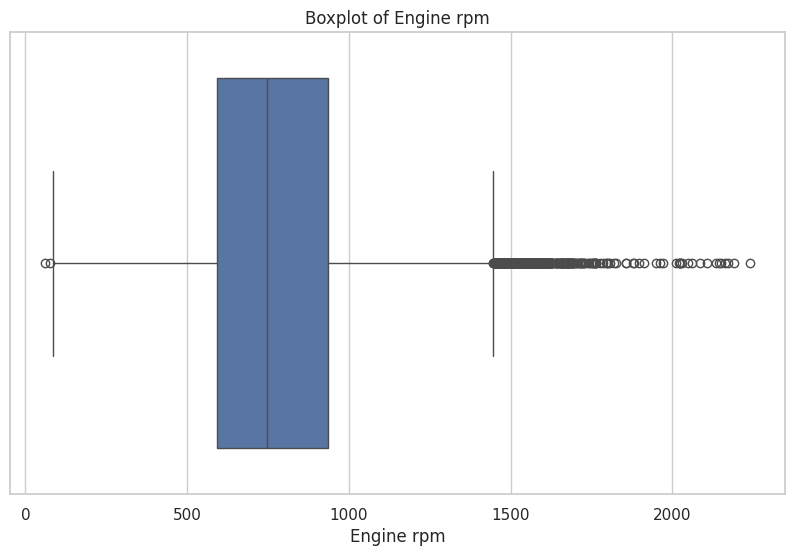

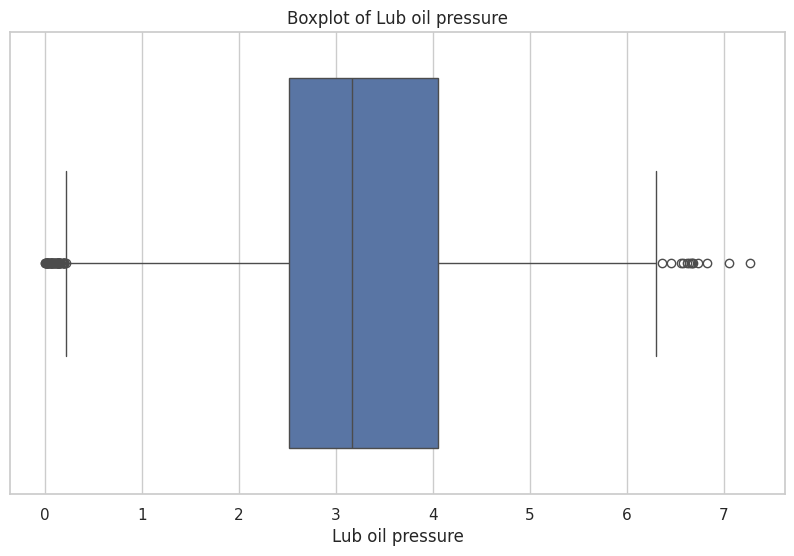

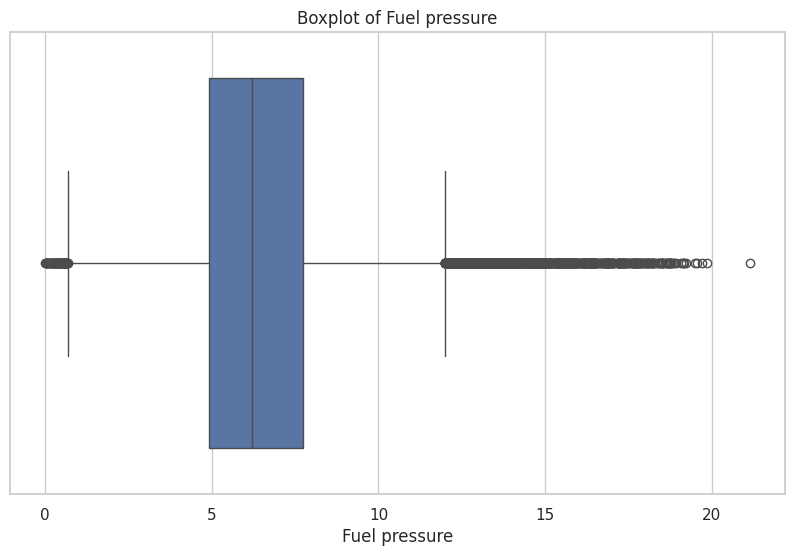

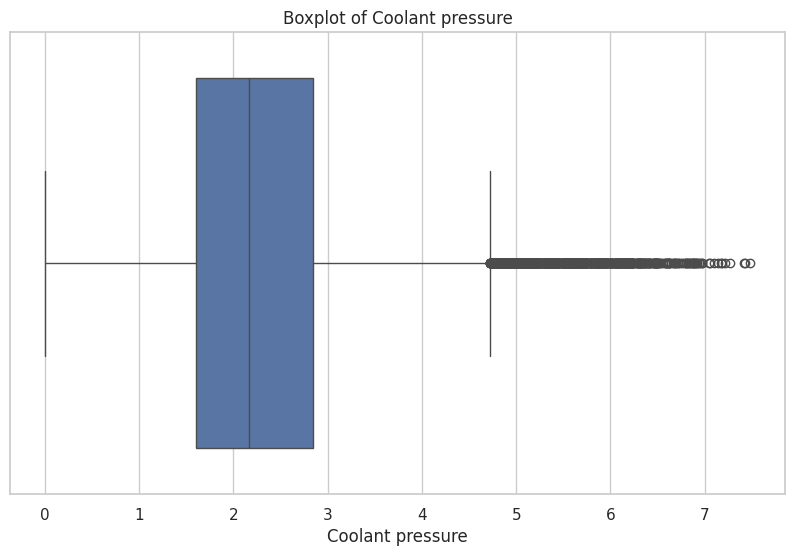

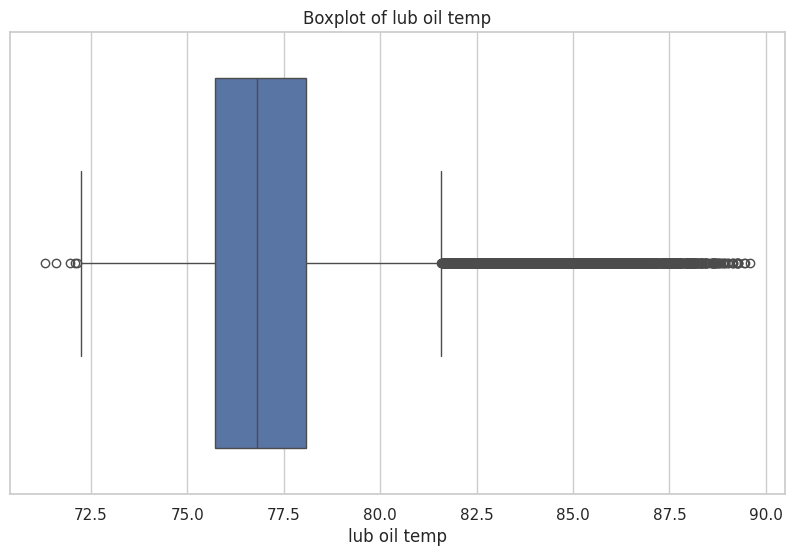

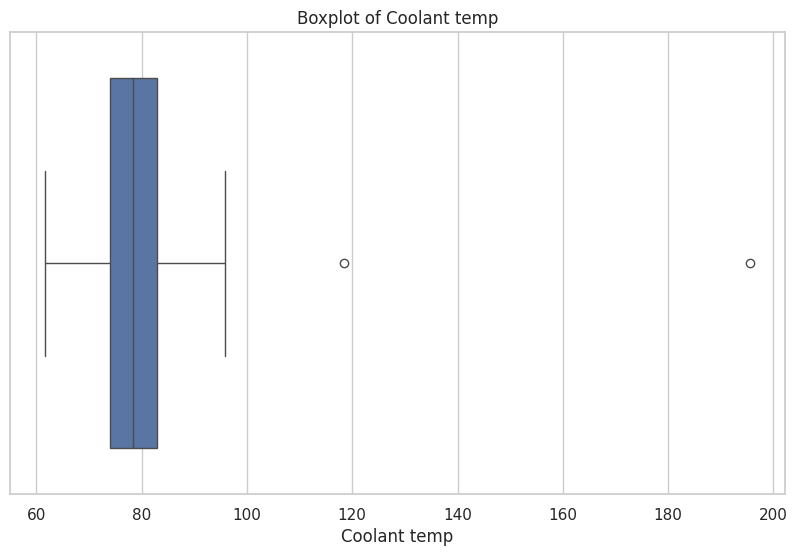

In [ ]:
#Boxplot visualisation of the distribution for the features
sns.set(style='whitegrid')

columns_to_plot = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column], orient='h')
    plt.title(f'Boxplot of {column}')
    plt.show()


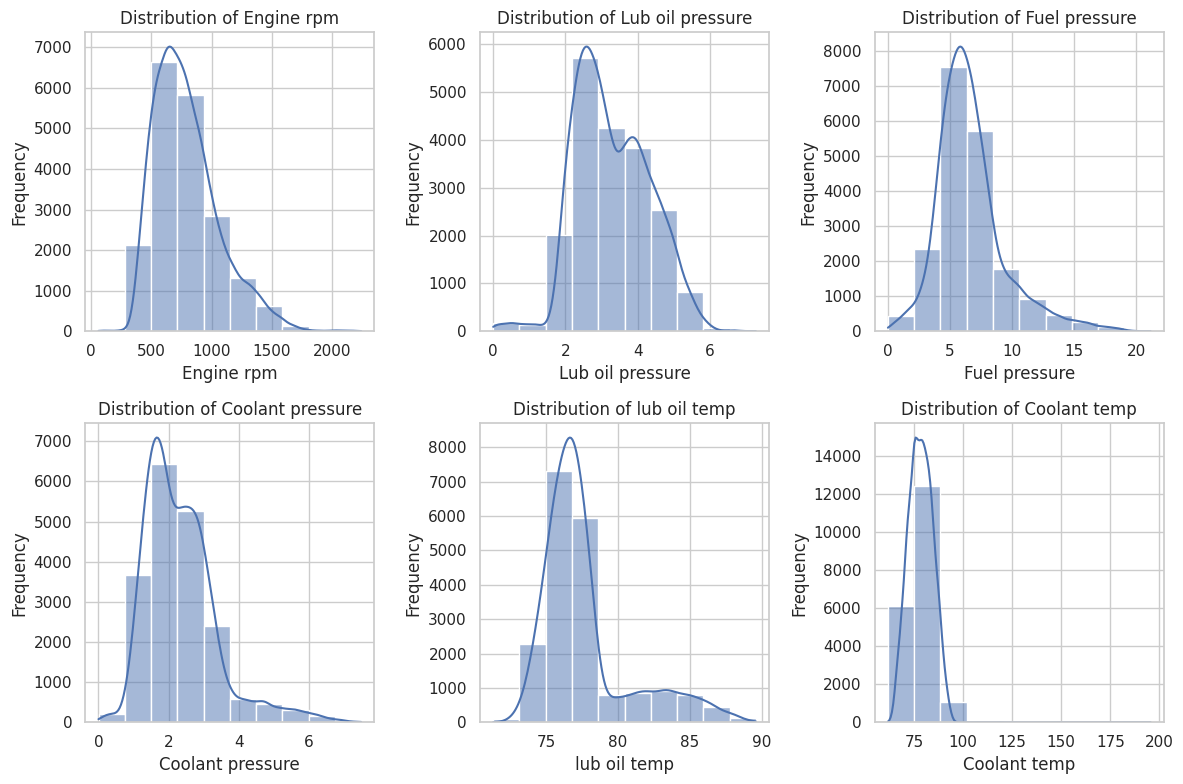

In [ ]:
# Histogram Visualisation for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=10)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From the histogram you can see that the data is skewed. Approach One - Anomolous detection using IQR is suitable for skewed data .

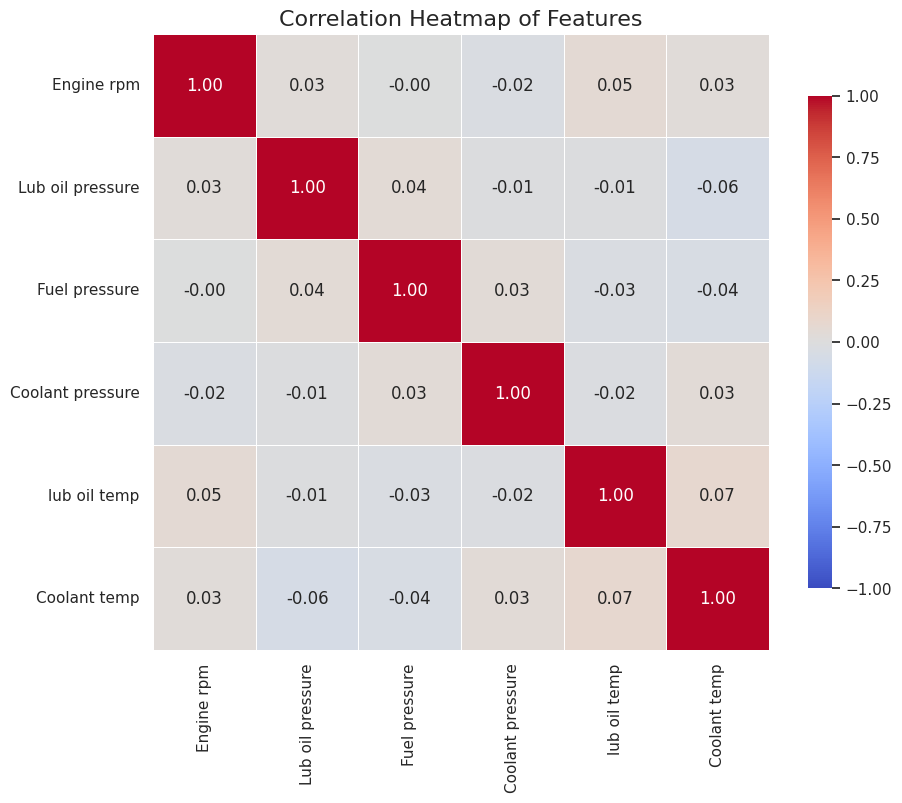

In [ ]:
#Compute the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

## Statistical Approach 1 - IQR Method
 To identify anomalies within such data, the Interquartile Range (IQR) method was applied to each of the six individual columns.

 1) Calculated the IQR for each feature, (IQR= Q3-Q1)

2) Anomaly threshold established - any data value below Q1-1.5(IQR) or above Q3+1.5(IQR)

3) All data values in each feature is checked and flagged if its an anomaly.

4) The sum of anomalies for each ship is calculated.


Based on previous studies, approximately 1-5% of ships are expected to display anomalous engine functionality. To align with this expectation, we calculated the percentage of ships exhibiting anomalies across one, two, three, or four features.


In [ ]:
# Define a function to calculate outliers:
def mark_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).astype(int)

# Create new columns in the dataframe for outliers
new_df = data.copy()

# Apply the function to each feature
new_df['Engine_rpm_outliers'] = mark_outliers(data['Engine rpm'])
new_df['Lub_oil_pressure_outliers'] = mark_outliers(data['Lub oil pressure'])
new_df['Fuel_pressure_outliers'] = mark_outliers(data['Fuel pressure'])
new_df['Coolant_pressure_outliers'] = mark_outliers(data['Coolant pressure'])
new_df['Lub_oil_temp_outliers'] = mark_outliers(data['lub oil temp'])
new_df['Coolant_temp_outliers'] = mark_outliers(data['Coolant temp'])

# Check the first few rows of the new DataFrame
print(new_df.head())

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  Engine_rpm_outliers  Lub_oil_pressure_outliers  \
0     76.272417     69.884609                    0                          0   
1     73.222679     74.907314                    0                          0   
2     88.089916     78.704806                    0                          0   
3     77.661625     82.386700                    0                          0   
4     75.226352     67.153220                    0                          0   

   Fuel_pressure_outliers  Coolant_pressure_outliers  Lub_oil_temp_outliers  \
0                       0

In [ ]:
outlier_columns = [
    'Engine_rpm_outliers',
    'Lub_oil_pressure_outliers',
    'Fuel_pressure_outliers',
    'Coolant_pressure_outliers',
    'Lub_oil_temp_outliers',
    'Coolant_temp_outliers'
]

# Sum across the outlier columns for each row
new_df['Outlier_Total'] = new_df[outlier_columns].sum(axis=1)

# Display the updated DataFrame
print(new_df.head())

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  Engine_rpm_outliers  Lub_oil_pressure_outliers  \
0     76.272417     69.884609                    0                          0   
1     73.222679     74.907314                    0                          0   
2     88.089916     78.704806                    0                          0   
3     77.661625     82.386700                    0                          0   
4     75.226352     67.153220                    0                          0   

   Fuel_pressure_outliers  Coolant_pressure_outliers  Lub_oil_temp_outliers  \
0                       0

In [ ]:
# Count rows where Outlier_Total is 2 or more
rows_with_2_or_more_outliers = (new_df['Outlier_Total'] >= 2).sum()

# Print the result
print(f"Number of rows with 2 or more outliers: {rows_with_2_or_more_outliers}")

Number of rows with 2 or more outliers: 422


In [ ]:
# Total number of rows in the dataset
total_rows = 19535

# Iterate over the target values and calculate both count and percentage
for value in [1, 2, 3, 4]:
    count = (new_df['Outlier_Total'] == value).sum()
    percentage = (count / total_rows) * 100
    print(f"Number of rows with {value} outlier(s): {count} ({percentage:.2f}%)")

Number of rows with 1 outlier(s): 4214 (21.57%)
Number of rows with 2 outlier(s): 411 (2.10%)
Number of rows with 3 outlier(s): 11 (0.06%)
Number of rows with 4 outlier(s): 0 (0.00%)


## Conclusion:

- The majority of ships (21.6%) exhibited anomalies in a single feature, which is insufficient to justify maintenance intervention. It would be costly and not feasible to use this condition to identify ships requiring servicing and maintenance.
- Ships with anomalies in three or more features were exceedingly rare (<0.1%), and no ships had anomalies in all four features.Ships with anomalies in two features should be flagged for further investigation and potential maintenance.

- Using the 1-5% magnitude provided to us by the client, we determined that any ship engine with 2 or more outliers detected will be flagged. Ships with 2 or more outliers detected provide anomolus activity of 1-5%.

## ML Approach 1 - Machine Learning using One-Class SVM Method

1) The data was first scaled using standardisation

2) A range of gamma and nu values were tested to identify the parameter combination thatbest aligns with the expected 1-5% anomaly rate.

3) We sum the number of ships with anomalies and calculate the percentage of ships overall that have anomalous engine functionality.

The following Combination of Parameters were used:
1. Gamma = auto and NU= 0.2
2. Gamma = auto and NU=0.05
3. Gamma = auto and NU = 0.02
4. NU = 0.02 amd Gamma = 0.2
5. NU = 0.02 and Gamma = 0.1
6. NU= 0.02 and Gamma = 0.05

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd

#Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
model.fit(X_scaled)

# Predict anomalies
y_pred = model.predict(X_scaled)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# percentage of anomalies
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100

# Total anomaly percentage calculation
print(data_with_anomalies.head())
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  anomaly  
0     76.272417     69.884609        1  
1     73.222679     74.907314       -1  
2     88.089916     78.704806        1  
3     77.661625     82.386700        1  
4     75.226352     67.153220        1  
Percentage of anomalies: 10.00%


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.2)
model.fit(X_scaled)

# Predict anomalies
y_pred = model.predict(X_scaled)
# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# percentage of anomalies
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100

# Total anomaly percentage calculation
print(data_with_anomalies.head())
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  anomaly  
0     76.272417     69.884609        1  
1     73.222679     74.907314       -1  
2     88.089916     78.704806       -1  
3     77.661625     82.386700        1  
4     75.226352     67.153220        1  
Percentage of anomalies: 20.00%


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# #Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
model.fit(X_scaled)

# Predict anomalies
y_pred = model.predict(X_scaled)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# percentage of anomalies
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100

# Total anomaly percentage calculation
print(data_with_anomalies.head())
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  anomaly  
0     76.272417     69.884609        1  
1     73.222679     74.907314       -1  
2     88.089916     78.704806        1  
3     77.661625     82.386700        1  
4     75.226352     67.153220        1  
Percentage of anomalies: 5.00%


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.02)
model.fit(X_scaled)

# Predict anomalies
y_pred = model.predict(X_scaled)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# percentage of anomalies
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100

# Total anomaly percentage calculation
print(data_with_anomalies.head())
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  anomaly  
0     76.272417     69.884609        1  
1     73.222679     74.907314        1  
2     88.089916     78.704806        1  
3     77.661625     82.386700        1  
4     75.226352     67.153220        1  
Percentage of anomalies: 2.05%


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma=0.2, nu=0.02)
model.fit(X_scaled)

# Predict anomalies
y_pred = model.predict(X_scaled)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# percentage of anomalies
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100

# Total anomaly percentage calculation
print(data_with_anomalies.head())
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  anomaly  
0     76.272417     69.884609        1  
1     73.222679     74.907314       -1  
2     88.089916     78.704806        1  
3     77.661625     82.386700        1  
4     75.226352     67.153220        1  
Percentage of anomalies: 1.99%


I kept nu the same as 0.02 and increased gamma from auto(0.166) to 0.2. This increased anomoly

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.02)
model.fit(X_scaled)

# Predict anomalies
y_pred = model.predict(X_scaled)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# percentage of anomalies
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100

# Total anomaly percentage calculation
print(data_with_anomalies.head())
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  anomaly  
0     76.272417     69.884609        1  
1     73.222679     74.907314       -1  
2     88.089916     78.704806        1  
3     77.661625     82.386700        1  
4     75.226352     67.153220        1  
Percentage of anomalies: 2.01%


I reduced gamma from 0.16(gamma=auto) to 0.1 while keeping nu constant. I got a smaller  percentage of anomolies with a reduced gamma

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma=0.05, nu=0.02)
model.fit(X_scaled)

# Predict anomalies
y_pred = model.predict(X_scaled)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# percentage of anomalies
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100

# Total anomaly percentage calculation
print(data_with_anomalies.head())
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  anomaly  
0     76.272417     69.884609        1  
1     73.222679     74.907314       -1  
2     88.089916     78.704806        1  
3     77.661625     82.386700        1  
4     75.226352     67.153220        1  
Percentage of anomalies: 2.02%


after reducing gamma to 0.05 and keeping nu at 0.2, the percentage of anomolies

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma=0.9, nu=0.02)
model.fit(X_scaled)

# Predict anomalies
y_pred = model.predict(X_scaled)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# percentage of anomalies
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100

# Total anomaly percentage calculation
print(data_with_anomalies.head())
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  anomaly  
0     76.272417     69.884609        1  
1     73.222679     74.907314       -1  
2     88.089916     78.704806        1  
3     77.661625     82.386700        1  
4     75.226352     67.153220        1  
Percentage of anomalies: 8.10%


### PCA Visualisation - One Class SVM Anomoly Detection


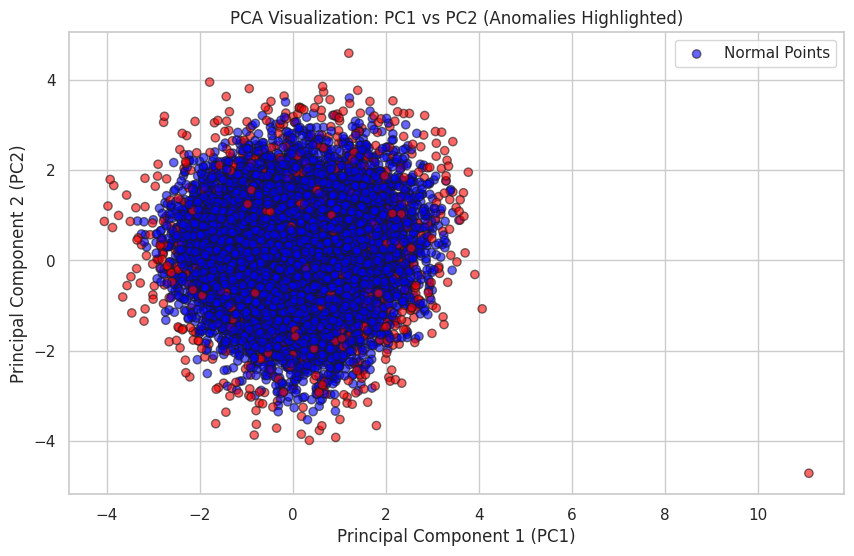

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the OneClassSVM model
model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)  # Adjust 'nu' to control anomaly percentage
model.fit(X_scaled)
y_pred = model.predict(X_scaled)  # -1 for anomalies, 1 for inliers

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components and anomaly predictions
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['anomaly'] = y_pred

# Visualize PC1 vs PC2 with anomalies highlighted
plt.figure(figsize=(10, 6))
colors = pca_df['anomaly'].map({1: 'blue', -1: 'red'})
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=0.6, edgecolor='k')
plt.title('PCA Visualization: PC1 vs PC2 (Anomalies Highlighted)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(['Normal Points', 'Anomalies'], loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

### Conclusion
- With lower nu values (like 0.02), the model becomes stricter, potentially
resulting in false negatives, where some anomalies go undetected
- The choice of nu = 0.05 when keeping gamma is 0.167 balances the need to detect engine issues while minimising unnecessary maintenance checks. It results in a 5% anomaly detection rate, aligning with the desired threshold.
- From the PCA visualisations, most of normal points are clustered tightly in the centre, which indicates that most ship engine data falls within normal range,
- There are red anomalies that are inside the blue clustered centre which suggest there are subtly issues that are not immediately obvious but need further investigation. It could be noise or an early indicator of engine performance issues
- Most of the anomalies form a ring around the blue normal data. This suggest that most anomalies are mild deviations, these data points could represent an early stage issue that warrants further monitoring.
- Few data points deviate significantly from the normal cluster and represent strong outliers, these ships may require immediate investigation

## ML Approach 2 – Anomaly detection with Isolation Forest ML model

1) No Scaling was required for this algorithm

2) In Isolation Forest, the contamination parameter directly sets the percentage of anomalies, making it simple to control detection rates.

3) Contamination parameter was set to 5% as it ensures that more anomalies are detected within our 1-5% desired detection rate.

4) The n_ estimators parameter was set to 100 as it is a good balance between model stability and computational efficiency.


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Train the Isolation Forest model
model = IsolationForest(n_estimators=100,contamination=0.05, random_state=42)
model.fit(X)
y_pred = model.predict(X)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# Prepare scaled data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Total anomaly percentage calculation
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100
print(f"Percentage of anomalies detected: {anomaly_percentage:.2f}%")

Percentage of anomalies detected: 5.00%


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Features used for anomaly detection
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

# Train the Isolation Forest model
model = IsolationForest(n_estimators=100,contamination=0.03, random_state=42)
model.fit(X)
y_pred = model.predict(X)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# Prepare scaled data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Total anomaly percentage calculation
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
anomaly_percentage = (anomaly_count / total_rows) * 100
print(f"Percentage of anomalies detected: {anomaly_percentage:.2f}%")

Percentage of anomalies detected: 3.00%


### PCA Visualisation - Isolation Forest

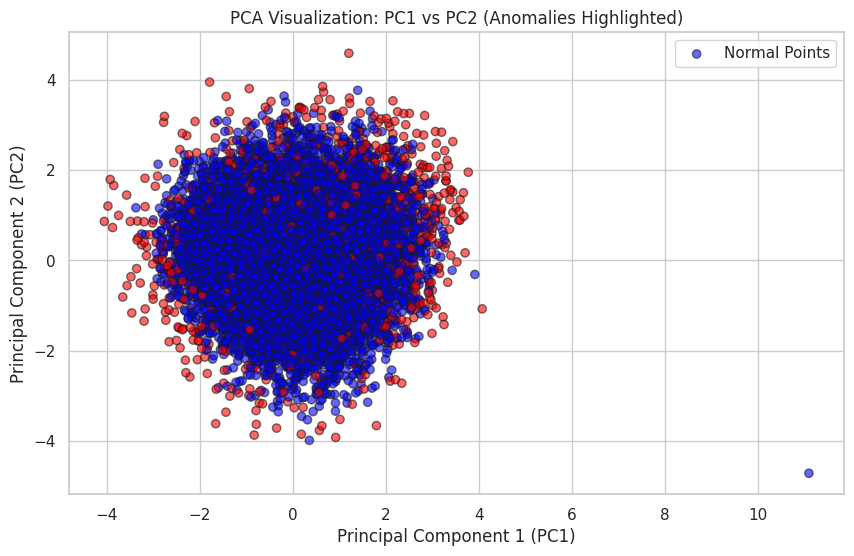

In [ ]:
# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  DataFrame with PCA components and anomaly predictions
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['anomaly'] = y_pred

# Visualisation of PC1 vs PC2 with anomalies highlighted
plt.figure(figsize=(10, 6))
colors = pca_df['anomaly'].map({1: 'blue', -1: 'red'})  # Normal points in blue, anomalies in red
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=0.6, edgecolor='k')
plt.title('PCA Visualization: PC1 vs PC2 (Anomalies Highlighted)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(['Normal Points', 'Anomalies'], loc='upper right')
plt.grid(True)
plt.show()

### Conclusion
- In Isolation Forest, the contamination parameter directly sets the percentage of anomalies, making it simple to control detection rates


## Evaluation:

Review of Approaches:
- The dataset contains 19,534 rows, which is relatively small for machine learning, and has low correlation between features, making anomaly detection challenging using the IQR method. Machine learning methods are more practical for this type of data as they can account for feature interactions, unlike IQR, which analyzes features independently and is less suitable for multivariate anomaly detection.

- One-Class SVM is better suited than the other two in capturing anomalies in higher-dimensional space.

- Given the scenario, machine learning methods are more practical, as IQR is designed to analyze each feature independently, making it less effective for detecting anomalies arising from interactions between multiple features. Machine learning models, on the other hand,can account for relationships between features.